<a href="https://colab.research.google.com/github/powidla/ML-course/blob/main/spline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
# Подключаем библиотеки, для работы с массивами используем библиотеку numpys
import numpy as np
import math 
import matplotlib.pyplot as plt

In [16]:
def cubic_spline(x0, x, y):

    x = np.asfarray(x) # массивы заданной размерности, х - исходный массив 
    y = np.asfarray(y)

    # проверка сортировки массива 
    if np.any(np.diff(x) < 0):
        indexes = np.argsort(x)  # сортировка по индексам элементов массива 
        x = x[indexes]  # для каждого из массивовы
        y = y[indexes]

    size = len(x)   # длина массива х, чтобы выполнялись матричные вычисления длины массивов должны совпадать

    xdiff = np.diff(x) # вычисление разности для разных точек узла, аналог производной для одномерной разностной схемы
    ydiff = np.diff(y)

    # создаем пустые матрицы, которые потом заполним значениями вычислений сплайна
    Li = np.empty(size)
    Li_1 = np.empty(size-1)
    z = np.empty(size) # величина интерполируемого вектора

    # условие матричного уравнения на главные диагонали заданной матрицы
    Li[0] = math.sqrt(2 * xdiff[0])
    Li_1[0] = 0.0
    B0 = 0.0 # начальное условие
    z[0] = B0 / Li[0]

    # Зполнение матрицы по размеру массивов - 1, заполняем по матричным формулам 
    for i in range(1, size-1, 1):
        Li_1[i] = xdiff[i-1] / Li[i-1]
        Li[i] = math.sqrt(2 * (xdiff[i-1] + xdiff[i]) - Li_1[i-1] * Li_1[i-1])
        Bi = 6 * (ydiff[i] / xdiff[i] - ydiff[i-1] / xdiff[i-1])
        z[i] = (Bi - Li_1[i-1] * z[i-1]) / Li[i]

    i = size - 1
    Li_1[i-1] = xdiff[-1] / Li[i-1]
    Li[i] = math.sqrt(2 * xdiff[-1] - Li_1[i-1] * Li_1[i-1])
    Bi = 0.0 # аналогичное начальное условие для элементов вектора b
    z[i] = (Bi - Li_1[i-1] * z[i-1]) / Li[i]

    # решение матричного уравнения [L.T][x] = [y] чтобы заполнить массив z  
    i = size-1
    z[i] = z[i] / Li[i]
    for i in range(size-2, -1, -1):
        z[i] = (z[i] - Li_1[i-1] * z[i+1]) / Li[i]

    # поиск индекса нулевого приближения в виде x0
    index = x.searchsorted(x0)
    np.clip(index, 1, size-1, index)

    # задаем значения для скаляров в формулу кубического сплайна, для значений массивов задаем через индексы и вводим величину шага
    xi1, xi0 = x[index], x[index-1]
    yi1, yi0 = y[index], y[index-1]
    zi1, zi0 = z[index], z[index-1]
    hi1 = xi1 - xi0 # шаг

    # вычисление кубического сплайна по стандартной формуле значения функции в точке
    f0 = zi0/(6*hi1)*(xi1-x0)**3 + \
         zi1/(6*hi1)*(x0-xi0)**3 + \
         (yi1/hi1 - zi1*hi1/6)*(x0-xi0) + \
         (yi0/hi1 - zi0*hi1/6)*(xi1-x0)
    return f0

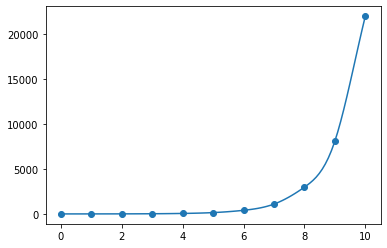

In [19]:
# Пример выполнения для экспоненты
x = np.linspace(0, 10, 11)
y = np.exp(x)
plt.scatter(x, y)

x_new = np.linspace(0, 10, 100)
plt.plot(x_new, cubic_spline(x_new, x, y))

plt.show()